In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_event = pd.read_csv("Dataset/events.csv")
df_event.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [5]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [8]:
df_ginf = pd.read_csv("Dataset/ginf.csv")
df_ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


In [9]:
df_ginf.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [42]:
leagues = {'E0': 'Premier League', 'SP1': 'La Liga', 'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}
event_types = {1:'Intento', 2:'Corner', 3:'Falta', 4:'Tarjeta amarilla', 5:'Segunda tarjeta amarilla', 6:'Tarjeta roja', 7:'Cambio jugador', 8:'Tiro libre ganado', 9:'Posicion adelantada', 10:'Lateral', 11:'Penal'}
event_types2 = {12:'Pase clave', 13:'Pase fallado', 14:'Expulsión', 15:'Gol encontra'}
sides = {1:'Local', 2:'visitante'}
shot_places = {1:'Tiro alto', 2:'Bloqueado', 3:'Corner inf. izq.', 4:'Corner inf. der.', 5:'Circulo del medio', 6:'Laterales', 7:'Golpea barrera', 8:'Falla a la izq.', 9:'Falla a la der.', 10:'Demasiado alto', 11:'Centro sup. de la porteria', 12:'Corner sup. izq.', 13:'Corner sup. der.'}
shot_outcomes = {1:'Al arco', 2:'Fuera del arco', 3:'Bloqueado', 4:'Golpea barrera'}
locations = {1:'Medio atacante', 2:'Medio defensivo', 3:'Centro del area', 4:'A la izq.', 5:'A la der.', 6:'Angulo dificil y largo alcance', 7:'Angulo dificil a la izq.', 
             8:'Angulo dificil a la der.', 9:'Lado izq. de area', 10:'Lado izq. de area a 5.5m', 11:'Lado der. de area', 12:'Lado der. de area a 5.5m', 
             13:'Rango muy cercano', 14:'Penal atajado', 15:'Fuera del area', 16:'De largo alcance', 17:'Mas de 32m', 18:'Mas de 36.6m', 19:'No registrado'}

bodyparts = {1:'Pie izq.', 2:'Pie der.', 3:'Cabeza'}
assist_methods = {1:'Pase', 2:'Cruzado', 3:'Pase de cabeza', 4:'Pase en profundidad'}
situations = {1:'Inicio de jugada', 2:'Pelota parada', 3:'Corner', 4:'Tiro libre'}

In [10]:
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_event = df_event.merge(df_ginf, how='left')
df_event.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break',
       'date', 'league', 'season', 'country'],
      dtype='object')

In [11]:
events_series = df_event['event_type'].value_counts()
print(events_series)

8     237932
3     232925
1     229135
2      91204
7      51738
9      43476
4      39911
10     10730
11      2706
6       1152
5        100
Name: event_type, dtype: int64


In [12]:
df_event[(df_event.league == "F1")][["event_type" , "date"]].head(10)

,event_type,date
369,8,2011-08-06
370,8,2011-08-06
371,3,2011-08-06
372,8,2011-08-06
373,3,2011-08-06
374,1,2011-08-06
375,8,2011-08-06
376,8,2011-08-06
377,3,2011-08-06
378,1,2011-08-06


In [19]:
leagues = {'E0': 'Premier League', 'SP1': 'La Liga', 'I1': 'Serie A',
           'F1': 'League One', 'D1': 'Bundesliga'}
lea = df_event.groupby(['league']).agg({'league':'count'})
print(lea)

        league
league        
D1      174573
E0      118920
F1      208446
I1      227127
SP1     211943


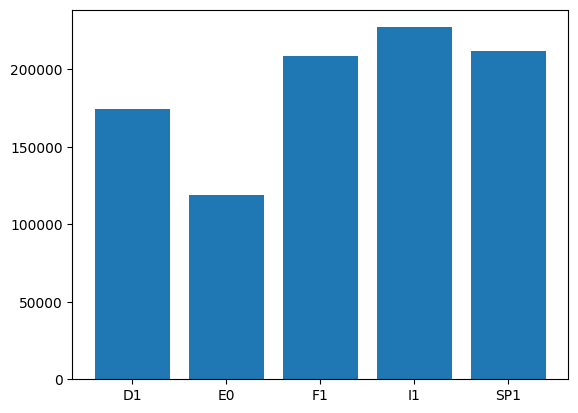

In [23]:
x = np.array(["D1", "E0", "F1", "I1", "SP1"])
y = np.array([174572, 118920 , 208446 , 227127 , 211943])
plt.bar(x , y)
plt.show()

In [24]:
#Si el event_type es igual a intento y is_goal = 
df_shot_places = df_event[(df_event['event_type'] == 2) & 
                           (df_event['is_goal'] == 0)]['shot_place'].value_counts()
print(df_shot_places)

2.0     54082
8.0     27024
9.0     25213
5.0     20633
6.0     15910
10.0    15793
4.0     11816
3.0     11048
1.0      6077
11.0     5402
13.0     4149
12.0     3960
7.0      3575
Name: shot_place, dtype: int64


In [31]:
df_event[(df_event.is_goal == 1)]

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,1,9.0,2.0,1,1.0,0,2011-08-05,D1,2012,germany
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,1,3.0,1.0,1,1.0,0,2011-08-05,D1,2012,germany
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,...,1,13.0,1.0,0,3.0,0,2011-08-05,D1,2012,germany
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,...,1,3.0,2.0,0,3.0,0,2011-08-05,D1,2012,germany
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,...,1,15.0,1.0,1,1.0,1,2011-08-06,D1,2012,germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940713,xY7uZwOI/,xY7uZwOI26,26,24,"Goal! Monaco 1, Lorient 0. Boschilia (Monaco)...",1,NaN,1,AS Monaco,Lorient,...,1,3.0,2.0,0,1.0,0,2017-01-22,F1,2017,france
940716,xY7uZwOI/,xY7uZwOI29,29,28,"Goal! Monaco 2, Lorient 0. Boschilia (Monaco)...",1,12.0,1,AS Monaco,Lorient,...,1,9.0,2.0,1,1.0,0,2017-01-22,F1,2017,france
940722,xY7uZwOI/,xY7uZwOI35,35,37,"Goal! Monaco 3, Lorient 0. Valere Germain (Mo...",1,NaN,1,AS Monaco,Lorient,...,1,9.0,1.0,0,1.0,0,2017-01-22,F1,2017,france
940742,xY7uZwOI/,xY7uZwOI58,58,59,"Goal! Monaco 4, Lorient 0. Valere Germain (Mo...",1,12.0,1,AS Monaco,Lorient,...,1,11.0,1.0,1,1.0,0,2017-01-22,F1,2017,france


In [59]:
gol_segund_lugar_tiro.shot_place.replace({1:'Tiro alto', 2:'Bloqueado', 3:'Corner inf. izq.', 4:'Corner inf. der.', 5:'Circulo del medio', 6:'Laterales', 7:'Golpea barrera', 8:'Falla a la izq.', 9:'Falla a la der.', 10:'Demasiado alto', 11:'Centro sup. de la porteria', 12:'Corner sup. izq.', 13:'Corner sup. der.'})

AttributeError: 'DataFrame' object has no attribute 'shot_place'

In [57]:
gol_segund_lugar_tiro = df_event.groupby(['shot_place']).agg({"is_goal" : "count"})
print(gol_segund_lugar_tiro)

                            is_goal
shot_place                         
Bloqueado                     54082
Centro sup. de la porteria     5402
Circulo del medio             25079
Corner inf. der.              18748
Corner inf. izq.              18260
Corner sup. der.               6306
Corner sup. izq.               5983
Demasiado alto                15798
Falla a la der.               25213
Falla a la izq.               27024
Golpea barrera                 3575
Laterales                     15910
Tiro alto                      6079


In [58]:
gol_segund_lugar_tiro.sort_values(["is_goal"], ascending=False)

,is_goal
shot_place,
Bloqueado,54082
Falla a la izq.,27024
Falla a la der.,25213
Circulo del medio,25079
Corner inf. der.,18748
Corner inf. izq.,18260
Laterales,15910
Demasiado alto,15798
Corner sup. der.,6306


In [60]:
gol_segund_lugar_tiro.columns

Index(['is_goal'], dtype='object')

In [61]:
df_event.groupby(['id_odsp']).agg({'id_odsp':'count'})

,id_odsp
id_odsp,
004f4ING/,77
00LMl81F/,125
00OX4xFp/,103
00QH2XdM/,96
00QL4t1L/,103
...,...
zyEQMq2D/,90
zyJsFDYG/,94
zyKwAQxf/,84
